# World Bank GDP

In [1]:
!pip install psycopg2

In [2]:
# import dependencies
import psycopg2 as pg
import pandas as pd
from sqlalchemy import create_engine
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import requests
import os
import numpy as np
import pandas as pd
import json
import ast
from pprint import pprint

### CSV Imports

In [3]:
#import the GDP csv
csv_file = "Resources/gdp.csv"
gdp_df = pd.read_csv(csv_file, encoding ="ISO-8859-1")
gdp_df.head()

,Country,Abbreviation,GDP_Ranking,US_dollars
0,United States,USA,1,"19,485,394"
1,China,CHN,2,"12,237,700"
2,Japan,JPN,3,"4,872,415"
3,Germany,DEU,4,"3,693,204"
4,India,IND,5,"2,650,725"


In [4]:
#preview the count
gdp_df.count()

Country         200
Abbreviation    200
GDP_Ranking     200
US_dollars      200
dtype: int64

In [5]:
#get the name of the columns

gdp_df.columns

Index(['Country', 'Abbreviation', 'GDP_Ranking', 'US_dollars'], dtype='object')

In [6]:
#import the countries csv

ccsv_file = "Resources/countries.csv"
countries_df = pd.read_csv(ccsv_file, encoding ="ISO-8859-1")
countries_df.head()

,Country,Region,Population,Area_In_Sq_mi,Population_Density_Sq_Mi,Net_Migration,Infant_Mortality_per_1000_Births,GDP_Per_Capita,Literacy_Percent,Phones_per_1000,Arable_Percent,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,23.06,163.07,700.0,36.0,3.2,12.13,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,-4.93,21.52,4500.0,86.5,71.2,21.09,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,-0.39,31.00,6000.0,70.0,78.1,3.22,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,-20.71,9.27,8000.0,97.0,259.5,10.00,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,6.60,4.05,19000.0,100.0,497.2,2.22,8.71,6.25,NaN,NaN,NaN


In [7]:
#preview the count

countries_df.count()

Country                             227
Region                              227
Population                          227
Area_In_Sq_mi                       227
Population_Density_Sq_Mi            227
Net_Migration                       224
Infant_Mortality_per_1000_Births    224
GDP_Per_Capita                      226
Literacy_Percent                    209
Phones_per_1000                     223
Arable_Percent                      225
Birthrate                           224
Deathrate                           223
Agriculture                         212
Industry                            211
Service                             212
dtype: int64

In [8]:
#get the name of the columns

countries_df.columns

Index(['Country', 'Region', 'Population', 'Area_In_Sq_mi',
       'Population_Density_Sq_Mi', 'Net_Migration',
       'Infant_Mortality_per_1000_Births', 'GDP_Per_Capita',
       'Literacy_Percent', 'Phones_per_1000', 'Arable_Percent', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [9]:
#import the happiness csv

hcsv_file = "Resources/happiness.csv"
happiness_df = pd.read_csv(hcsv_file, encoding ="ISO-8859-1")
happiness_df.head()

,Country_name,Happiness_Rank,Happiness_Score,Whisker_High,Whisker_Low,Per_Capita_GDP,Family_Support_Score,Health_Life_Expectance_Score,Freedom_Score,Generosity_Score,Trust_In_Government_Score,Dystopia_Residual_Score
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [10]:
#preview the count

happiness_df.count()

Country_name                    155
Happiness_Rank                  155
Happiness_Score                 155
Whisker_High                    155
Whisker_Low                     155
Per_Capita_GDP                  155
Family_Support_Score            155
Health_Life_Expectance_Score    155
Freedom_Score                   155
Generosity_Score                155
Trust_In_Government_Score       155
Dystopia_Residual_Score         155
dtype: int64

In [11]:
#get the name of the columns

happiness_df.columns

Index(['Country_name', 'Happiness_Rank', 'Happiness_Score', 'Whisker_High',
       'Whisker_Low', 'Per_Capita_GDP', 'Family_Support_Score',
       'Health_Life_Expectance_Score', 'Freedom_Score', 'Generosity_Score',
       'Trust_In_Government_Score', 'Dystopia_Residual_Score'],
      dtype='object')

### Creating New Data With Select Columns

In [12]:
#gdp_df

new_gdp_df = gdp_df[['Country', 'Abbreviation', 'GDP_Ranking', 'US_dollars']].copy()
new_gdp_df.head()

,Country,Abbreviation,GDP_Ranking,US_dollars
0,United States,USA,1,"19,485,394"
1,China,CHN,2,"12,237,700"
2,Japan,JPN,3,"4,872,415"
3,Germany,DEU,4,"3,693,204"
4,India,IND,5,"2,650,725"


In [13]:
#countries_df

new_countries_df = countries_df[['Country', 'Region', 'Population', 'Area_In_Sq_mi',
       'Population_Density_Sq_Mi', 'Net_Migration',
       'Infant_Mortality_per_1000_Births', 'GDP_Per_Capita',
       'Literacy_Percent', 'Phones_per_1000', 'Arable_Percent', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service']].copy()
new_countries_df.head()

,Country,Region,Population,Area_In_Sq_mi,Population_Density_Sq_Mi,Net_Migration,Infant_Mortality_per_1000_Births,GDP_Per_Capita,Literacy_Percent,Phones_per_1000,Arable_Percent,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,23.06,163.07,700.0,36.0,3.2,12.13,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,-4.93,21.52,4500.0,86.5,71.2,21.09,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,-0.39,31.00,6000.0,70.0,78.1,3.22,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,-20.71,9.27,8000.0,97.0,259.5,10.00,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,6.60,4.05,19000.0,100.0,497.2,2.22,8.71,6.25,NaN,NaN,NaN


In [14]:
#happiness_df

new_happiness_df = happiness_df[['Country_name', 'Happiness_Rank', 'Happiness_Score', 'Whisker_High',
       'Whisker_Low', 'Per_Capita_GDP', 'Family_Support_Score',
       'Health_Life_Expectance_Score', 'Freedom_Score', 'Generosity_Score',
       'Trust_In_Government_Score', 'Dystopia_Residual_Score']].copy()
new_happiness_df.head()

,Country_name,Happiness_Rank,Happiness_Score,Whisker_High,Whisker_Low,Per_Capita_GDP,Family_Support_Score,Health_Life_Expectance_Score,Freedom_Score,Generosity_Score,Trust_In_Government_Score,Dystopia_Residual_Score
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### Store The Data Into a DataFrame

In [15]:
#store the data into a gdp_db

rds_connection_string = "postgres:M612a786b@localhost:5432/gdp_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [16]:
#check for tables
engine.table_names()

['gdp', 'countries', 'happiness', 'gdp_score', 'country_score']

### Load csv converted DataFrame into database

In [ ]:
new_gdp_df.to_sql(name='gdp', con=engine, if_exists='append', index=False)

In [ ]:
new_countries_df.to_sql(name='countries', con=engine, if_exists='append', index=False)

In [ ]:
new_happiness_df.to_sql(name='happiness', con=engine, if_exists='append', index=False)

In [ ]:
#confirm the gdp_data has been added to the table

pd.read_sql_query('select * from gdp', con=engine).head()

In [ ]:
#confirm the countries_data has been added to the table

pd.read_sql_query('select * from countries', con=engine).head()

In [ ]:
#confirm the happiness_data has been added to the table

pd.read_sql_query('select * from happiness', con=engine).head()

In [17]:
connection = pg.connect("host='127.0.0.1' dbname=gdp_db user=postgres password='M612a786b'")
#dataframe = pd.read_sql_query("select * from happiness left join countries on happiness.Country=countries.Country", connection)

In [18]:
gdp_df=pd.read_sql_query("select * from gdp_score",connection)

In [19]:
clean_gdp=gdp_df.dropna()

In [170]:
clean_gdp

,Country,US_dollars,GDP_Ranking,Happiness_Rank
0,United States,"19,485,394",1,14.0
1,China,"12,237,700",2,79.0
2,Japan,"4,872,415",3,51.0
3,Germany,"3,693,204",4,16.0
4,India,"2,650,725",5,122.0
5,United Kingdom,"2,637,866",6,19.0
6,France,"2,582,501",7,31.0
7,Brazil,"2,053,595",8,22.0
8,Italy,"1,943,835",9,48.0
9,Canada,"1,647,120",10,7.0


In [171]:
country_happy_df=pd.read_sql_query("select * from country_score",connection)

In [172]:
clean_country_happy_df=country_happy_df.dropna()
clean_country_happy_df.head(3)

,Country_name,Happiness_Rank,Happiness_Score,Whisker_High,Whisker_Low,Per_Capita_GDP,Family_Support_Score,Health_Life_Expectance_Score,Freedom_Score,Generosity_Score,...,Infant_Mortality_per_1000_Births,GDP_Per_Capita,Literacy_Percent,Phones_per_1000,Arable_Percent,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,141,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,...,163.07,700.0,36.0,3.2,12.13,46.60,20.34,0.380,0.240,0.380
1,Albania,109,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,...,21.52,4500.0,86.5,71.2,21.09,15.11,5.22,0.232,0.188,0.579
2,Algeria,53,5.872,5.978286,5.765714,1.091864,1.146217,0.617585,0.233336,0.069437,...,31.00,6000.0,70.0,78.1,3.22,17.14,4.61,0.101,0.600,0.298


In [173]:
clean_country_happy_df.head()
clean_country_happy_df['HLE_Score']=clean_country_happy_df['Health_Life_Expectance_Score']*10
clean_country_happy_df['Non_Agri_GDP']=clean_country_happy_df['Industry']+clean_country_happy_df['Service']

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [174]:
country_happy_sorted=clean_country_happy_df.sort_values(['Happiness_Score'],ascending=False)

### Data preparation for comparing Happiness Score and Health Life Expectancy Scores of Top 10 and Bottom 10 countries

In [175]:
ch_data_top10=country_happy_sorted.iloc[0:10]
ch_data_bot10=country_happy_sorted.iloc[-11:-1]

In [176]:
chart1_data=ch_data_top10[['Country_name','Happiness_Score','HLE_Score']]
chart2_data=ch_data_bot10[['Country_name','Happiness_Score','HLE_Score']]
chart1_data.reset_index(drop=True)
chart2_data.reset_index(drop=True)

,Country_name,Happiness_Score,HLE_Score
0,Benin,3.657,2.099302
1,Madagascar,3.644,3.752233
2,Haiti,3.603,2.773211
3,Yemen,3.593,3.100809
4,Liberia,3.533,2.299182
5,Guinea,3.507,1.941291
6,Togo,3.495,2.471056
7,Rwanda,3.471,3.264248
8,Syria,3.462,5.005333
9,Tanzania,3.349,3.645093


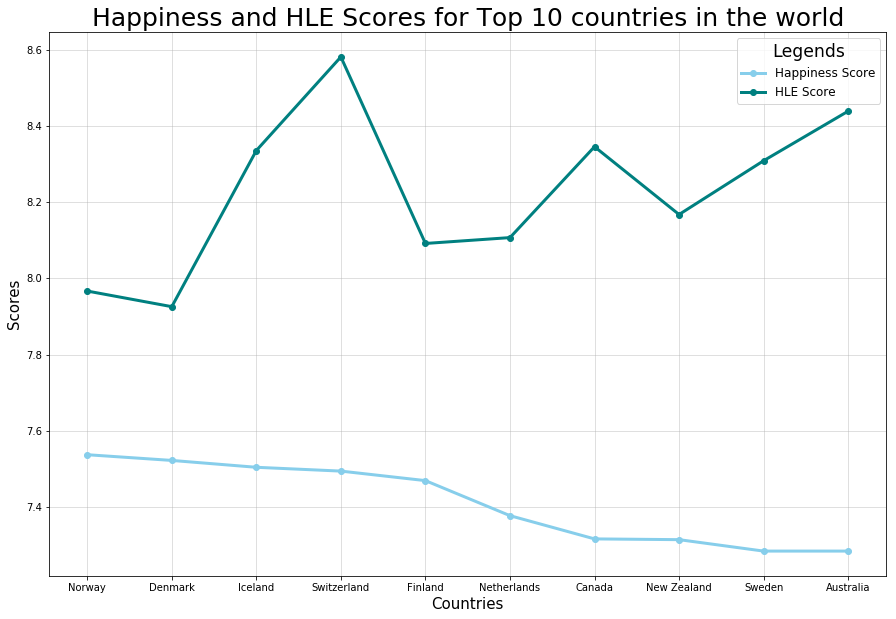

In [177]:
plt.figure(1, figsize=(15,10))
# plotting Happiness Score for Top 10 countries by Happiness score
Happiness, = plt.plot(chart1_data['Country_name'], chart1_data['Happiness_Score'], color="skyblue", marker='o', label = "Happiness Score", linewidth=3,)

# plotting EU action trend
HLE, = plt.plot(chart1_data['Country_name'], chart1_data['HLE_Score'], color="teal", marker='o', label="HLE Score", linewidth=3,)

# Create a legend for our chart
plt.legend(handles=[Happiness, HLE], loc="best", title="Legends", title_fontsize = 'xx-large', fontsize = 'large')

plt.title("Happiness and HLE Scores for Top 10 countries in the world", fontsize =25)
plt.xlabel("Countries", fontsize =15)
plt.ylabel("Scores", fontsize =15)
plt.grid(alpha=.5)
plt.savefig("Images/Happiness_Score_top10.jpg", bbox_inches='tight')


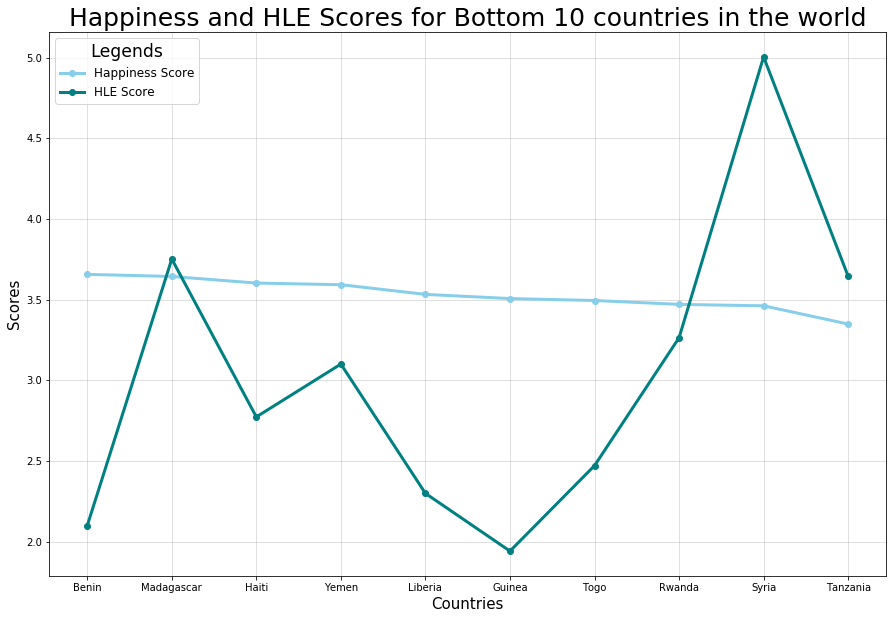

In [178]:
plt.figure(1, figsize=(15,10))
# plotting Happiness Score for Top 10 countries by Happiness score
Happiness, = plt.plot(chart2_data['Country_name'], chart2_data['Happiness_Score'], color="skyblue", marker='o', label = "Happiness Score", linewidth=3,)

# plotting EU action trend
HLE, = plt.plot(chart2_data['Country_name'], chart2_data['HLE_Score'], color="teal", marker='o', label="HLE Score", linewidth=3,)

# Create a legend for our chart
plt.legend(handles=[Happiness, HLE], loc="best", title="Legends", title_fontsize = 'xx-large', fontsize = 'large')

plt.title("Happiness and HLE Scores for Bottom 10 countries in the world", fontsize =25)
plt.xlabel("Countries", fontsize =15)
plt.ylabel("Scores", fontsize =15)
plt.grid(alpha=.5)
plt.savefig("Images/Happiness_Score_bottom10.jpg", bbox_inches='tight')



### Data preparation for comparing Non Agri contribution to GDO to Happiness Score of Top 10 and Bottom 10 countries

In [179]:
chart3_data=ch_data_top10[['Country_name','Happiness_Score','Non_Agri_GDP']]
chart4_data=ch_data_bot10[['Country_name','Happiness_Score','Non_Agri_GDP']]
chart3_data['Happiness_Score']=chart3_data['Happiness_Score']/10
chart4_data['Happiness_Score']=chart4_data['Happiness_Score']/10
chart3_data.reset_index(drop=True)
chart4_data.reset_index(drop=True)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Country_name,Happiness_Score,Non_Agri_GDP
0,Benin,0.3657,0.684
1,Madagascar,0.3644,0.724
2,Haiti,0.3603,0.720
3,Yemen,0.3593,0.865
4,Liberia,0.3533,0.231
5,Guinea,0.3507,0.763
6,Togo,0.3495,0.605
7,Rwanda,0.3471,0.599
8,Syria,0.3462,0.749
9,Tanzania,0.3349,0.568


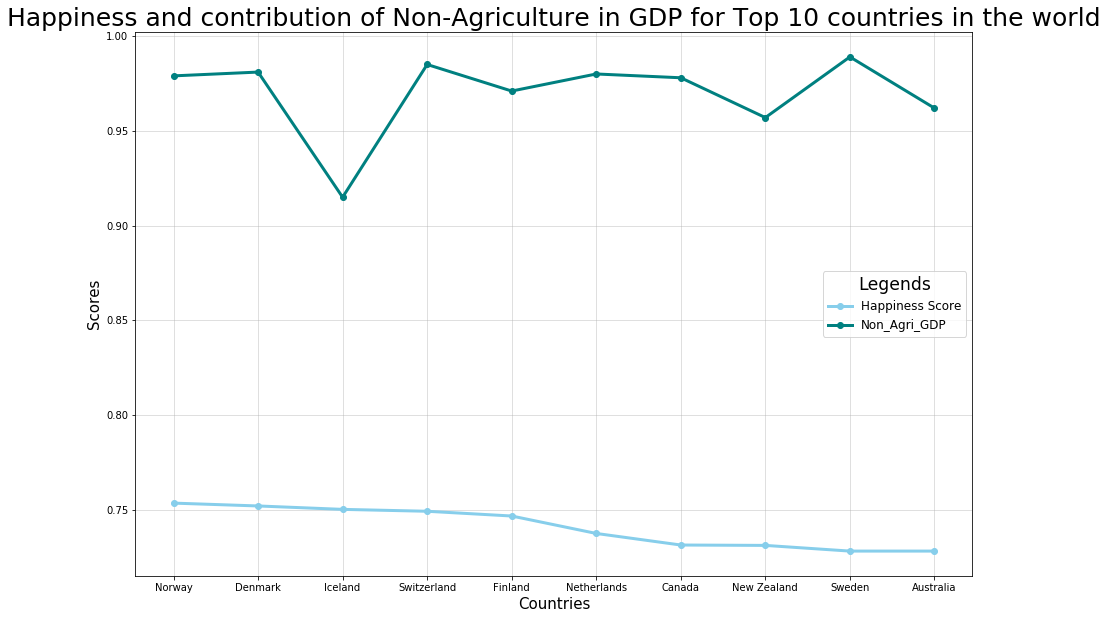

In [180]:
plt.figure(1, figsize=(15,10))
# plotting Happiness Score for Top 10 countries to contribution of other than agriculture in the GDP
Happiness, = plt.plot(chart3_data['Country_name'], chart3_data['Happiness_Score'], color="skyblue", marker='o', label = "Happiness Score", linewidth=3,)

# plotting EU action trend
Non_Agri_GDP, = plt.plot(chart3_data['Country_name'], chart3_data['Non_Agri_GDP'], color="teal", marker='o', label="Non_Agri_GDP", linewidth=3,)

# Create a legend for our chart
plt.legend(handles=[Happiness, Non_Agri_GDP], loc="best", title="Legends", title_fontsize = 'xx-large', fontsize = 'large')

plt.title("Happiness and contribution of Non-Agriculture in GDP for Top 10 countries in the world", fontsize =25)
plt.xlabel("Countries", fontsize =15)
plt.ylabel("Scores", fontsize =15)
plt.grid(alpha=.5)
plt.savefig("Images/Happiness_GDP_top10.jpg", bbox_inches='tight')

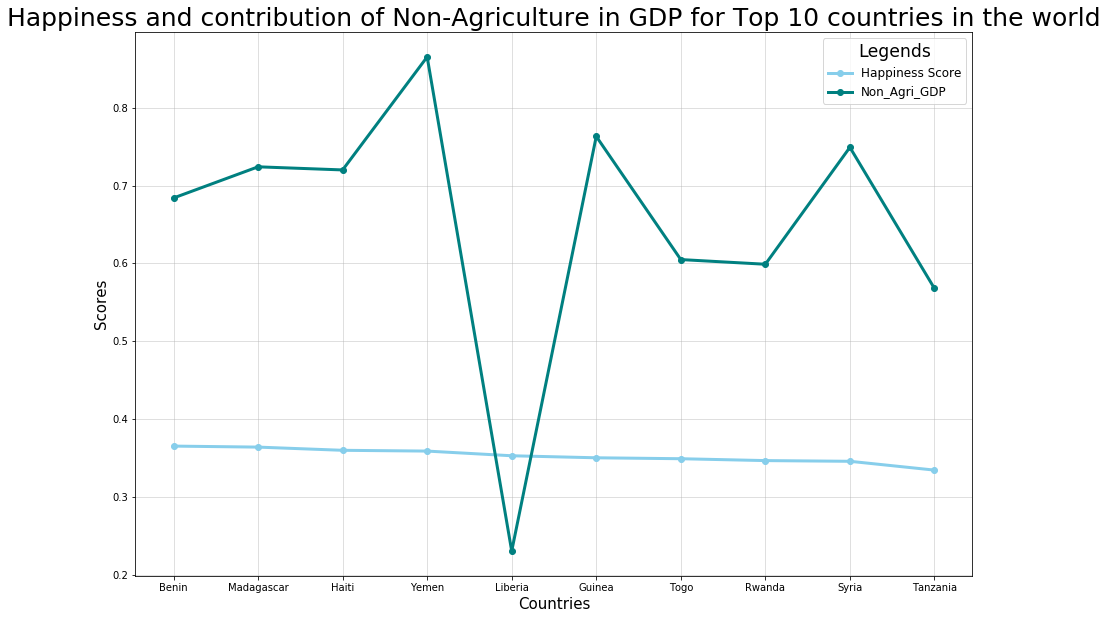

In [181]:
plt.figure(1, figsize=(15,10))
# plotting Happiness Score for Top 10 countries to contribution of other than agriculture in the GDP
Happiness, = plt.plot(chart4_data['Country_name'], chart4_data['Happiness_Score'], color="skyblue", marker='o', label = "Happiness Score", linewidth=3,)

# plotting EU action trend
Non_Agri_GDP, = plt.plot(chart4_data['Country_name'], chart4_data['Non_Agri_GDP'], color="teal", marker='o', label="Non_Agri_GDP", linewidth=3,)

# Create a legend for our chart
plt.legend(handles=[Happiness, Non_Agri_GDP], loc="best", title="Legends", title_fontsize = 'xx-large', fontsize = 'large')

plt.title("Happiness and contribution of Non-Agriculture in GDP for Top 10 countries in the world", fontsize =25)
plt.xlabel("Countries", fontsize =15)
plt.ylabel("Scores", fontsize =15)
plt.grid(alpha=.5)
plt.savefig("Images/Happiness_GDP_top10.jpg", bbox_inches='tight')

### Data preparation for comparing GDP Percapita to Literacy Score of Top 10 and Bottom 10 countries

In [182]:
chart5_data=ch_data_top10[['Country_name','GDP_Per_Capita','Literacy_Percent']]
chart6_data=ch_data_bot10[['Country_name','GDP_Per_Capita','Literacy_Percent']]
chart5_data.reset_index(drop=True)
chart6_data.reset_index(drop=True)

,Country_name,GDP_Per_Capita,Literacy_Percent
0,Benin,1100.0,40.9
1,Madagascar,800.0,68.9
2,Haiti,1600.0,52.9
3,Yemen,800.0,50.2
4,Liberia,1000.0,57.5
5,Guinea,2100.0,35.9
6,Togo,1500.0,60.9
7,Rwanda,1300.0,70.4
8,Syria,3300.0,76.9
9,Tanzania,600.0,78.2


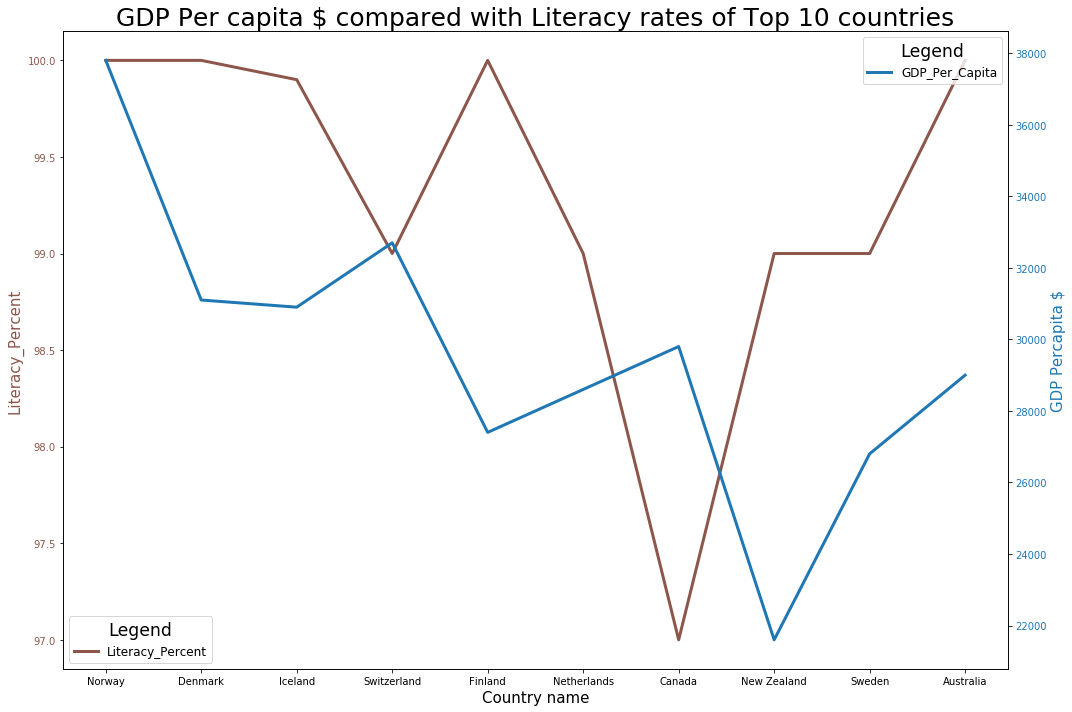

In [183]:
fig, ax1 = plt.subplots(figsize=(15,10))

color = 'tab:brown'
ax1.set_title ('GDP Per capita $ compared with Literacy rates of Top 10 countries', fontsize =25)
ax1.set_xlabel('Country name', fontsize=15)
ax1.set_ylabel('Literacy_Percent', color=color, fontsize=15)
ax1.plot(chart5_data['Country_name'], chart5_data['Literacy_Percent'], color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(title="Legend", title_fontsize = 'xx-large', fontsize = 'large')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('GDP Percapita $', color=color, fontsize=15)  # we already handled the x-label with ax1
ax2.plot(chart5_data['Country_name'], chart5_data['GDP_Per_Capita'], color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(title="Legend", title_fontsize = 'xx-large', fontsize = 'large')
fig.tight_layout()  # otherwise the right y-label is slightly clipped


# plot save

plt.savefig("Images/GDP-Literacy_top10.jpg", bbox_inches='tight')


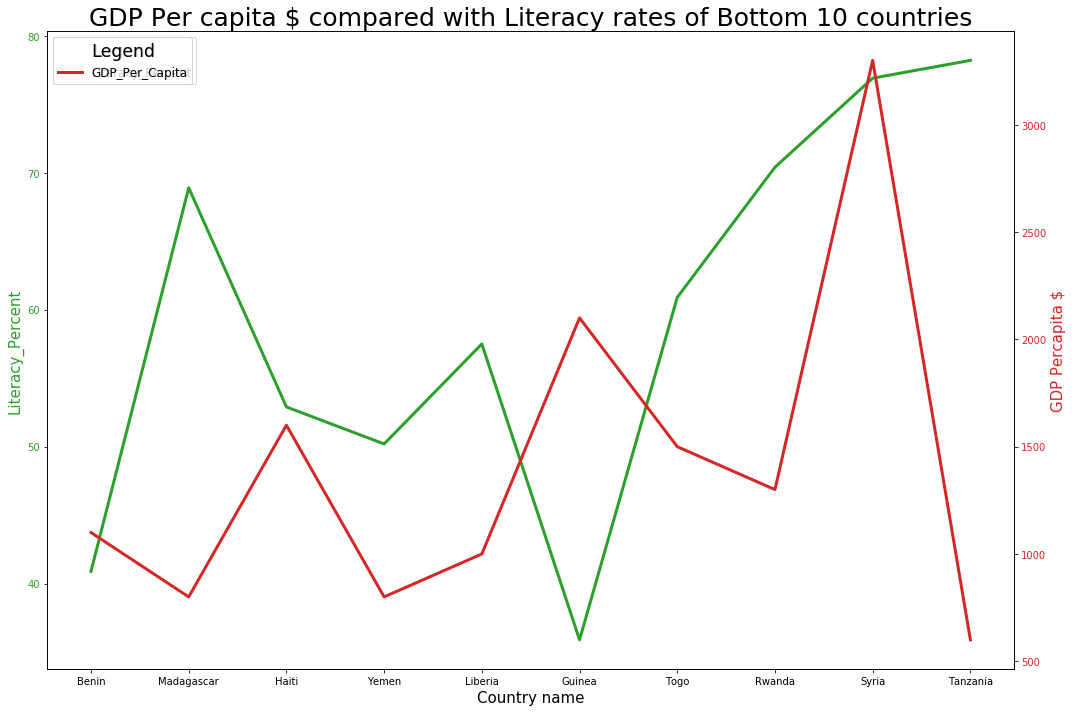

In [184]:
fig, ax1 = plt.subplots(figsize=(15,10))

color = 'tab:green'
ax1.set_title ('GDP Per capita $ compared with Literacy rates of Bottom 10 countries', fontsize =25)
ax1.set_xlabel('Country name', fontsize=15)
ax1.set_ylabel('Literacy_Percent', color=color, fontsize=15)
ax1.plot(chart6_data['Country_name'], chart6_data['Literacy_Percent'], color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(title="Legend", title_fontsize = 'xx-large', fontsize = 'large')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('GDP Percapita $', color=color, fontsize=15)  # we already handled the x-label with ax1
ax2.plot(chart6_data['Country_name'], chart6_data['GDP_Per_Capita'], color=color,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(title="Legend", title_fontsize = 'xx-large', fontsize = 'large')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# plot save

plt.savefig("Images/GDP-Literacy_bottom10.jpg", bbox_inches='tight')



### Data preparation for comparing GDP ranking to Happiness ranking of Top 10 and Bottom 10 countries

In [185]:
clean_gdp.head()

,Country,US_dollars,GDP_Ranking,Happiness_Rank
0,United States,"19,485,394",1,14.0
1,China,"12,237,700",2,79.0
2,Japan,"4,872,415",3,51.0
3,Germany,"3,693,204",4,16.0
4,India,"2,650,725",5,122.0


In [186]:
chart7_data=clean_gdp.iloc[0:10]
chart8_data=clean_gdp.iloc[-11:-1]

In [187]:
chart8_data

,Country,US_dollars,GDP_Ranking,Happiness_Rank
154,Mauritania,"5,025",155,123.0
156,Montenegro,"4,845",157,83.0
157,Togo,"4,758",158,150.0
160,Sierra Leone,"3,775",161,106.0
163,Liberia,"3,285",164,148.0
164,Burundi,"3,172",165,154.0
168,South Sudan,"2,904",169,147.0
171,Lesotho,"2,578",172,139.0
172,Bhutan,"2,528",173,97.0
174,Central African Republic,"1,949",175,155.0


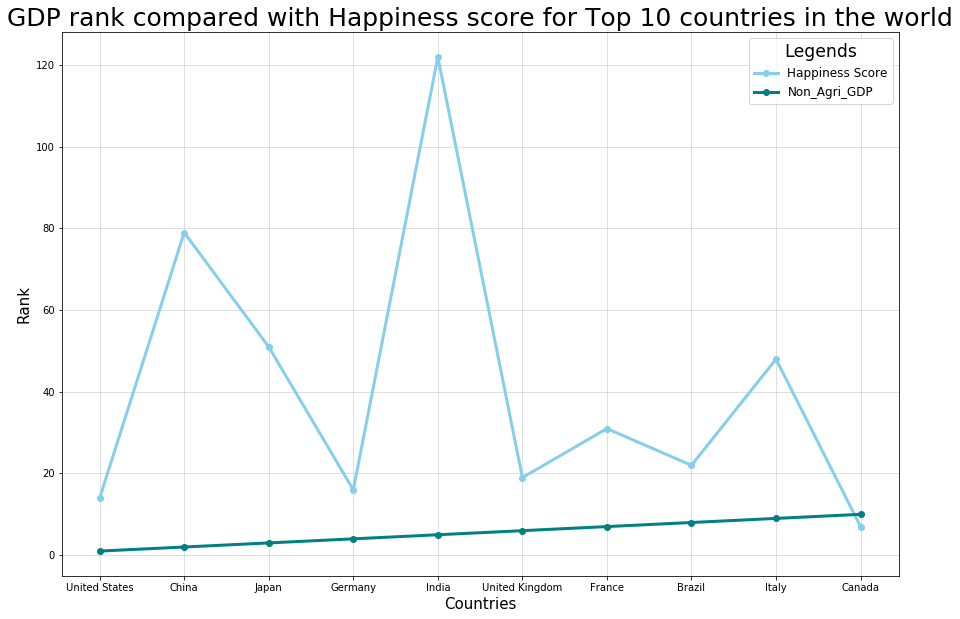

In [188]:
plt.figure(1, figsize=(15,10))
# plotting Happiness Score for Top 10 countries to GDP ranking
Happiness, = plt.plot(chart7_data['Country'], chart7_data['Happiness_Rank'], color="skyblue", marker='o', label = "Happiness Score", linewidth=3,)

# plotting EU action trend
GDP, = plt.plot(chart7_data['Country'], chart7_data['GDP_Ranking'], color="teal", marker='o', label="Non_Agri_GDP", linewidth=3,)

# Create a legend for our chart
plt.legend(handles=[Happiness, GDP], loc="best", title="Legends", title_fontsize = 'xx-large', fontsize = 'large')

plt.title("GDP rank compared with Happiness score for Top 10 countries in the world", fontsize =25)
plt.xlabel("Countries", fontsize =15)
plt.ylabel("Rank", fontsize =15)
plt.grid(alpha=.5)
plt.savefig("Images/Happiness_GDPRank_top10.jpg", bbox_inches='tight')

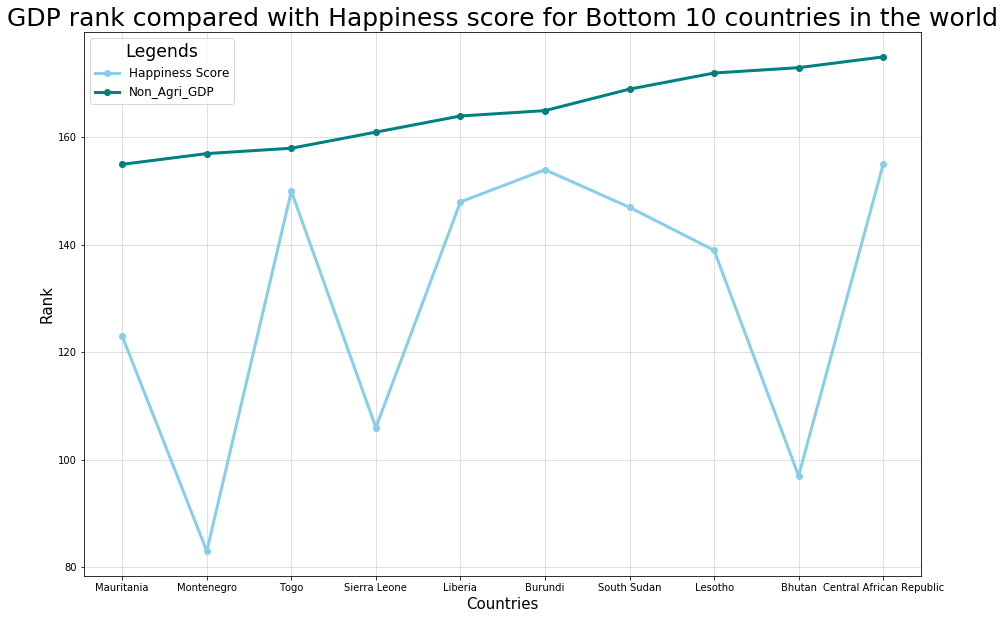

In [189]:
plt.figure(1, figsize=(15,10))
# plotting Happiness Score for Bottom 10 countries to GDP ranking
Happiness, = plt.plot(chart8_data['Country'], chart8_data['Happiness_Rank'], color="skyblue", marker='o', label = "Happiness Score", linewidth=3,)

# plotting EU action trend
GDP, = plt.plot(chart8_data['Country'], chart8_data['GDP_Ranking'], color="teal", marker='o', label="Non_Agri_GDP", linewidth=3,)

# Create a legend for our chart
plt.legend(handles=[Happiness, GDP], loc="best", title="Legends", title_fontsize = 'xx-large', fontsize = 'large')

plt.title("GDP rank compared with Happiness score for Bottom 10 countries in the world", fontsize =25)
plt.xlabel("Countries", fontsize =15)
plt.ylabel("Rank", fontsize =15)
plt.grid(alpha=.5)
plt.savefig("Images/Happiness_GDPRank_bottom10.jpg", bbox_inches='tight')

### GDP contribution by sectors for top 10 and bottom 10 countries in the world

In [190]:
chart9_data=ch_data_top10[['Country_name','Agriculture','Industry','Service']]
chart10_data=ch_data_bot10[['Country_name','Agriculture','Industry','Service']]
chart9_data.reset_index(drop=True)
chart10_data.reset_index(drop=True)

,Country_name,Agriculture,Industry,Service
0,Benin,0.316,0.138,0.546
1,Madagascar,0.276,0.165,0.559
2,Haiti,0.280,0.200,0.520
3,Yemen,0.135,0.472,0.393
4,Liberia,0.769,0.054,0.177
5,Guinea,0.237,0.362,0.401
6,Togo,0.395,0.204,0.401
7,Rwanda,0.401,0.229,0.370
8,Syria,0.249,0.230,0.519
9,Tanzania,0.432,0.172,0.396


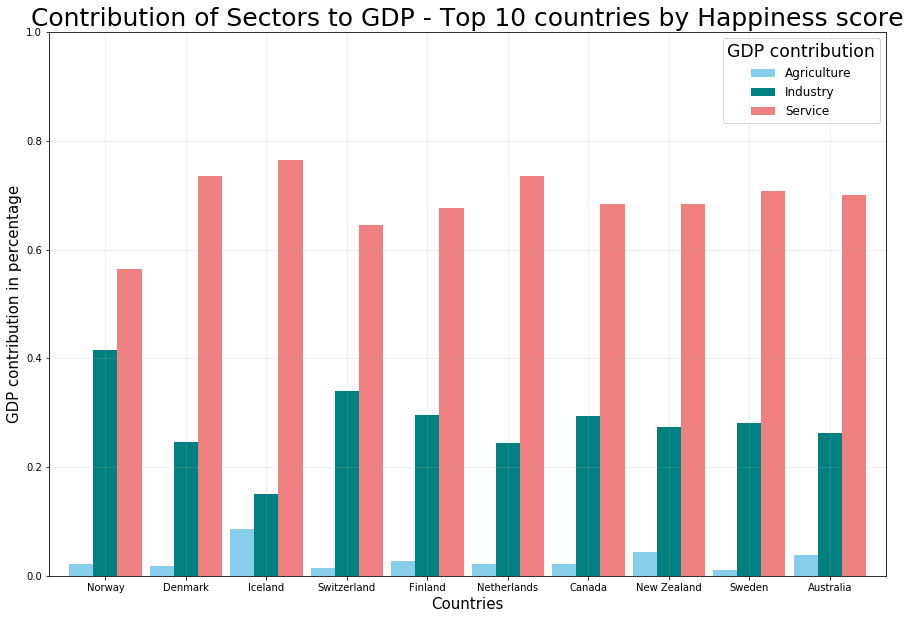

In [191]:
# generate bar chart for Top 10 countries by Happiness score

x_axis = np.arange(10)
width = 0.3
fig,ax = plt.subplots(figsize=(15,10))


# plot Agriculture contribution to GDP
plt.bar(x_axis, chart9_data['Agriculture'], color='skyblue', width=width, label=chart9_data.columns[1], align='center')

# plot Industry contribution to GDP
plt.bar([p + width for p in x_axis], chart9_data['Industry'], color='teal', width=width, label=chart9_data.columns[2], align='center')

# plot Service contribution to GDP
plt.bar([p + width*2 for p in x_axis], chart9_data['Service'], color='lightcoral', width=width, label=chart9_data.columns[3], align='center')

# plot formatting
ax.set_title ('Contribution of Sectors to GDP - Top 10 countries by Happiness score', fontsize =25)
ax.set_xlabel('Countries', fontsize =15)
ax.set_ylabel('GDP contribution in percentage', fontsize =15)
ax.set_xticks([p + width for p in x_axis])
ax.set_xticklabels(chart9_data['Country_name'], rotation=0)

plt.xlim(-0.4, len(x_axis))
plt.ylim([0, 1])
plt.legend(title="GDP contribution", title_fontsize = 'xx-large', fontsize = 'large')
plt.grid(alpha=0.25)
plt.savefig("Images/GDP_Contribution-top10.jpg", bbox_inches='tight')
plt.show()

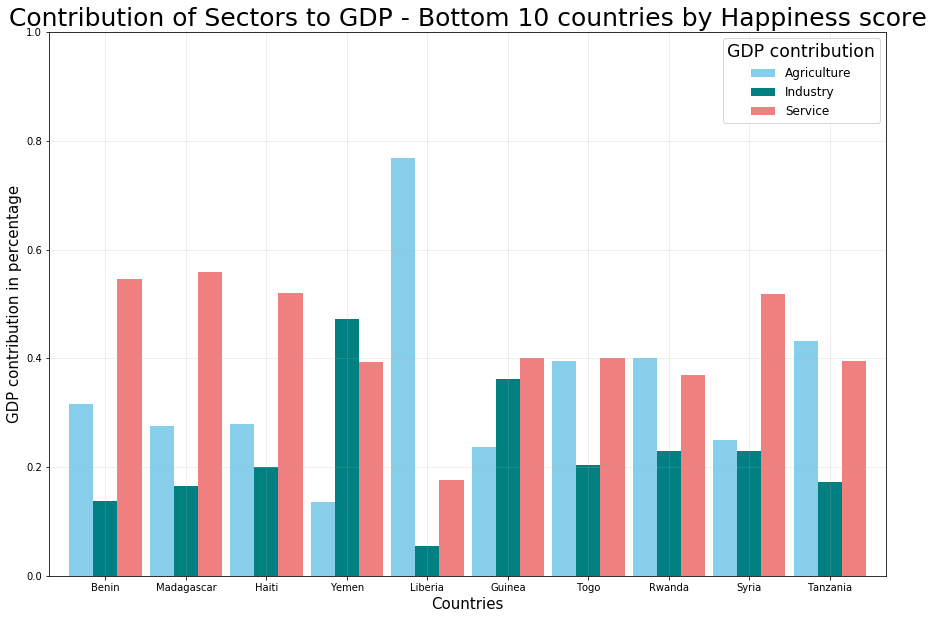

In [192]:
# generate bar chart for Bottom 10 countries by Happiness score

x_axis = np.arange(10)
width = 0.3
fig,ax = plt.subplots(figsize=(15,10))


# plot Agriculture contribution to GDP
plt.bar(x_axis, chart10_data['Agriculture'], color='skyblue', width=width, label=chart10_data.columns[1], align='center')

# plot Industry contribution to GDP
plt.bar([p + width for p in x_axis], chart10_data['Industry'], color='teal', width=width, label=chart10_data.columns[2], align='center')

# plot Service contribution to GDP
plt.bar([p + width*2 for p in x_axis], chart10_data['Service'], color='lightcoral', width=width, label=chart10_data.columns[3], align='center')

# plot formatting
ax.set_title ('Contribution of Sectors to GDP - Bottom 10 countries by Happiness score', fontsize =25)
ax.set_xlabel('Countries', fontsize =15)
ax.set_ylabel('GDP contribution in percentage', fontsize =15)
ax.set_xticks([p + width for p in x_axis])
ax.set_xticklabels(chart10_data['Country_name'], rotation=0)

plt.xlim(-0.4, len(x_axis))
plt.ylim([0, 1])
plt.legend(title="GDP contribution", title_fontsize = 'xx-large', fontsize = 'large')
plt.grid(alpha=0.25)
plt.savefig("Images/GDP_Contribution-bottom10.jpg", bbox_inches='tight')
plt.show()